In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,roc_curve,auc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv(r'C:\Users\Raghavendra N\OneDrive\Official\Datasets\ML Datasets\employees_attrition.csv')
data.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
data.shape

(1470, 35)

In [5]:
data.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [6]:
data.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [7]:
data.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [8]:
#0 : Employee does not quit
#1: Employee quits the organization
data.Attrition.value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

In [9]:
X = data.drop(["Attrition"],axis=1)
y = data["Attrition"]

In [10]:
print(X.shape)
print(y.shape)

(1470, 34)
(1470,)


In [11]:
#Encoding
X_dummies = pd.get_dummies(X)
X_dummies.head()

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  EmployeeNumber  \
0   41       1102                 1          2              1               1   
1   49        279                 8          1              1               2   
2   37       1373                 2          2              1               4   
3   33       1392                 3          4              1               5   
4   27        591                 2          1              1               7   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2          94               3         2  ...   
1                        3          61               2         2  ...   
2                        4          92               2         1  ...   
3                        4          56               3         1  ...   
4                        1          40               3         1  ...   

   JobRole_Research Director  JobRole_Research Scientist  \
0                          0                           0   
1                          0                           1   
2                          0                           0   
3                          0                           1   
4                          0                           0   

   JobRole_Sales Executive  JobRole_Sales Representative  \
0                        1                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   

   MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
0                       0                      0                     1   
1                       0                      1                     0   
2                       0                      0                     1   
3                       0                      1                     0   
4                       0                      1                     0   

   Over18_Y  OverTime_No  OverTime_Yes  
0         1            0             1  
1         1            1             0  
2         1            0             1  
3         1            0             1  
4         1            1             0  

[5 rows x 55 columns]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X_dummies,y,
                               test_size=0.3,random_state=80, stratify=y)

In [13]:
y_train.value_counts(normalize=True)

0    0.838678
1    0.161322
Name: Attrition, dtype: float64

In [14]:
y_test.value_counts(normalize=True)

0    0.839002
1    0.160998
Name: Attrition, dtype: float64

In [15]:
X_train.shape

(1029, 55)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred =logreg.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [19]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:", cm, sep='\n') 

Confusion Matrix is:
[[370   0]
 [ 70   1]]


In [22]:
print("accuracy:",accuracy_score(y_test, y_pred)*100)

accuracy: 84.12698412698413


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy',random_state=80)   
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=80, splitter='best')

In [18]:
pd.Series(clf.feature_importances_ ,index = X_dummies.columns).sort_values(ascending=False).head(10)

DailyRate               0.065112
MonthlyIncome           0.065058
NumCompaniesWorked      0.062796
DistanceFromHome        0.059065
OverTime_No             0.057907
YearsWithCurrManager    0.055396
EmployeeNumber          0.053841
Age                     0.050870
JobLevel                0.046593
TotalWorkingYears       0.046179
dtype: float64

In [19]:
y_pred = clf.predict(X_test)
#y_pred

In [22]:
clf.score(X_test,y_test)*100

79.59183673469387

In [23]:
metrics.f1_score(y_test,y_pred)

0.36619718309859156

## ROC Curve

In [24]:
def compute_auc(test, train_instance):
    probs = train_instance.predict_proba(test)
    prob_positive = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test,prob_positive)
    roc_auc = auc(fpr,tpr)
    return roc_auc,fpr,tpr

In [25]:
#Compute the area under the curve between fpr and tpr
roc_auc,fpr,tpr = compute_auc(X_test,clf)
roc_auc

0.6222877807384849

In [26]:
def plot_ROC(roc,fpr,tpr):
    plt.title("receiver Operating Charecteristc")
    plt.plot(fpr,tpr,'red',label = 'AUC=%0.2f'% roc)
    plt.legend(loc = 'lower right')
    plt.plot([0,1],[0,1], color = 'darkblue',linestyle='--')
    plt.ylabel('True positive Rate')
    plt.xlabel('False positive Rate')
    plt.show()

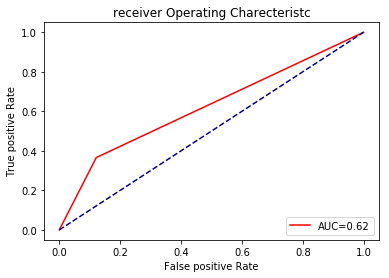

In [27]:
plot_ROC(roc_auc,fpr,tpr)

In [28]:
clf = DecisionTreeClassifier(random_state=80)
params = {'max_depth':list(range(1,11)), 'criterion':['gini', 'entropy']}
cv_model = GridSearchCV(clf, param_grid = params, cv = 5, scoring = 'roc_auc')
cv_model.fit(X_train,y_train)
print(cv_model.best_params_)

{'criterion': 'entropy', 'max_depth': 3}


In [29]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 3,random_state=80)

In [30]:
clf_tuned = clf.fit(X_train,y_train)

In [31]:
y_pred = clf_tuned.predict(X_test)

In [32]:
clf_tuned.score(X_test,y_test)

0.8435374149659864

In [33]:
roc_auc,fpr,tpr = compute_auc(X_test,clf_tuned)
roc_auc

0.7265321659687858

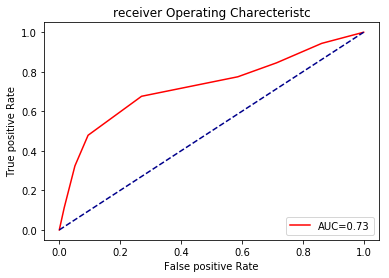

In [34]:
plot_ROC(roc_auc,fpr,tpr)

In [35]:
import matplotlib.pyplot as plt

In [36]:
from sklearn import tree
import matplotlib.pyplot as plt

In [37]:
cols = X_dummies.columns

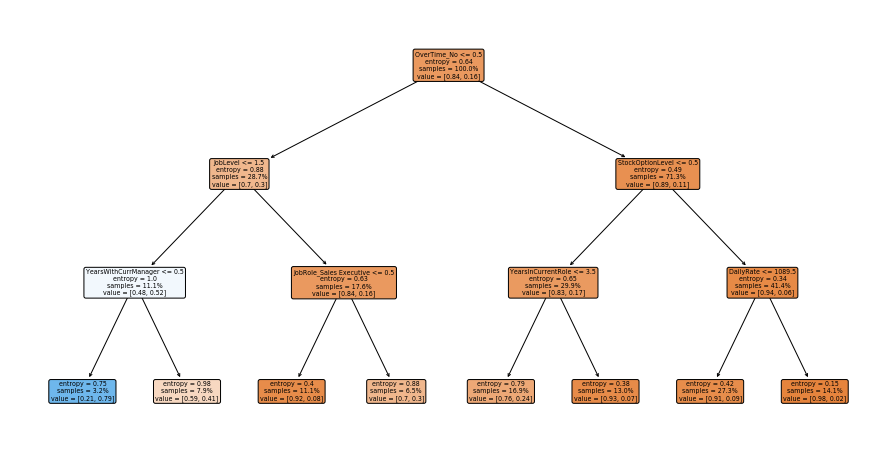

In [38]:
plt.figure(figsize=(15,8))
tree.plot_tree(clf_tuned, feature_names=cols, filled=True,precision=2,
               proportion=True,rounded=True)
plt.show()

# Implementing Ensemble models

In [39]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [40]:
#Create a Random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [41]:
y_pred = rf.predict(X_test)

In [42]:
rf.score(X_test,y_test)

0.8639455782312925

In [43]:
metrics.f1_score(y_test,y_pred)

0.3023255813953489

In [44]:
auc_rf,fpr,tpr = compute_auc(X_test,rf)
auc_rf

0.8581842405786069

In [45]:
rf = RandomForestClassifier(random_state=100)
params = {'n_estimators':[60,80,100,120,140,160,200,250,300]}
cv_model = GridSearchCV(rf, param_grid = params,scoring = 'roc_auc')
cv_model.fit(X_train,y_train)
print(cv_model.best_params_)

{'n_estimators': 200}


In [46]:
rf = RandomForestClassifier(n_estimators=200, random_state=0)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [47]:
rf.score(X_test,y_test)

0.8639455782312925

In [48]:
metrics.f1_score(y_test,y_pred)

0.2857142857142857

In [49]:
auc_rf,fpr,tpr = compute_auc(X_test,rf)
auc_rf

0.8608488770460602

In [50]:
#Fit Gradient boosting
gb=GradientBoostingClassifier(n_estimators=100, random_state=0)
gb.fit(X_train,y_train)
gb.score(X_test,y_test)

0.8707482993197279

In [51]:
y_pred = gb.predict(X_test)

In [52]:
metrics.f1_score(y_test,y_pred)

0.45714285714285713

In [53]:
auc_rf,fpr,tpr = compute_auc(X_test,gb)
auc_rf

0.856338028169014

In [58]:
gb = GradientBoostingClassifier(random_state=100)
params = {'n_estimators':[60,80,100,120,140,160,200,250,300]}
cv_model = GridSearchCV(gb, param_grid = params,scoring = 'roc_auc')
cv_model.fit(X_train,y_train)
print(cv_model.best_params_)

{'n_estimators': 100}


In [59]:
gb=GradientBoostingClassifier(n_estimators=100, random_state=0)
gb.fit(X_train,y_train)
gb.score(X_test,y_test)

0.8707482993197279

In [60]:
y_pred = gb.predict(X_test)

In [61]:
auc_gb,fpr,tpr = compute_auc(X_test,gb)
auc_gb

0.856338028169014